<a href="https://colab.research.google.com/github/NAVEEN8103/PracticeDataScience/blob/main/Trader_Behaviour_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")


/tmp/ipython-input-578355694.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv("historical_data.csv")


In [15]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
sentiment.shape

(2644, 4)

In [10]:
trades.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,88466.000000,8.846600e+04,8.846600e+04,8.846600e+04,88466.000000,8.846600e+04,88466.000000,8.846600e+04,8.846600e+04
mean,16932.345448,7.684868e+03,9.146970e+03,2.994961e+04,85.437590,6.747358e+10,1.820161,5.631056e+14,1.736622e+12
std,34273.213573,1.567284e+05,5.305213e+04,4.950459e+05,1248.813929,2.248297e+10,9.306153,3.263598e+14,1.087124e+10
min,0.000005,5.330000e-06,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,13.025000,1.000000e+00,2.108300e+02,-7.353450e-01,0.000000,6.092756e+10,0.010160,2.800000e+14,1.740000e+12
50%,21.093000,2.120000e+01,9.407350e+02,4.841300e+02,0.000000,7.446825e+10,0.104157,5.620000e+14,1.740000e+12
75%,2529.075000,1.305500e+02,3.895912e+03,3.026395e+04,11.492545,8.282621e+10,0.660738,8.480000e+14,1.740000e+12
max,108410.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [12]:
sentiment.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [16]:
print(trades.columns)
print(sentiment.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [20]:
trades.columns = trades.columns.str.strip().str.replace(' ', '_').str.lower()
sentiment.columns = sentiment.columns.str.strip().str.replace(' ', '_').str.lower()


CONVERT THE TIMESTAMP TO EXACT DATE AND TIME

In [22]:
trades['timestamp_ist'] = pd.to_datetime(
    trades['timestamp_ist'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)

trades['date'] = trades['timestamp_ist'].dt.date


In [23]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date


FILTER VALID TRADES (Closed PnL only)

In [38]:
trades = trades[trades['closed_pnl'].notna()]


Merge Trader Data with Market Sentiment

In [26]:
df = trades.merge(sentiment, on='date', how='inner')


In [27]:
df = trades.merge(sentiment, on='date', how='inner')


Feature Engineering

In [28]:
df['win'] = df['closed_pnl'] > 0


Exploratory Data Analysis (EDA)

In [29]:
df['classification'].value_counts()


,count
classification,
Fear,30657
Greed,20214
Neutral,15941
Extreme Greed,14213
Extreme Fear,7435


In [30]:
df.groupby('classification')['closed_pnl'].mean()


,closed_pnl
classification,
Extreme Fear,76.680902
Extreme Greed,121.900517
Fear,81.463878
Greed,77.679216
Neutral,71.859323


In [31]:
df.groupby('classification')['win'].mean()


,win
classification,
Extreme Fear,0.370679
Extreme Greed,0.510589
Fear,0.459764
Greed,0.407243
Neutral,0.465655


In [32]:
df.groupby('classification')['size_usd'].mean()


,size_usd
classification,
Extreme Fear,5266.810243
Extreme Greed,5961.550044
Fear,10797.609767
Greed,11204.017334
Neutral,8011.832792


Visualizations

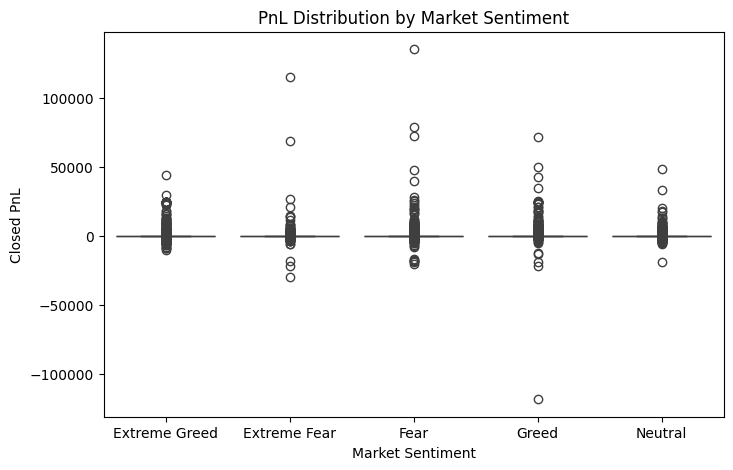

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='closed_pnl', data=df)
plt.title("PnL Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()


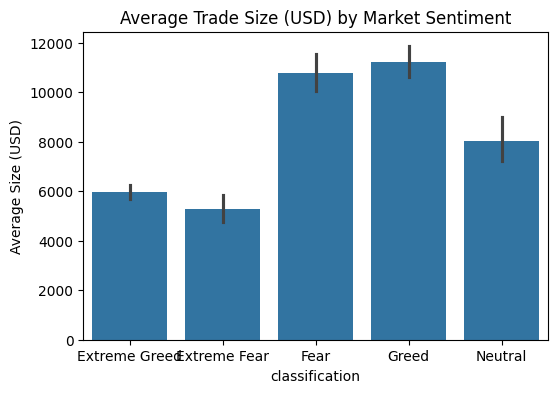

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='size_usd', data=df)
plt.title("Average Trade Size (USD) by Market Sentiment")
plt.ylabel("Average Size (USD)")
plt.show()


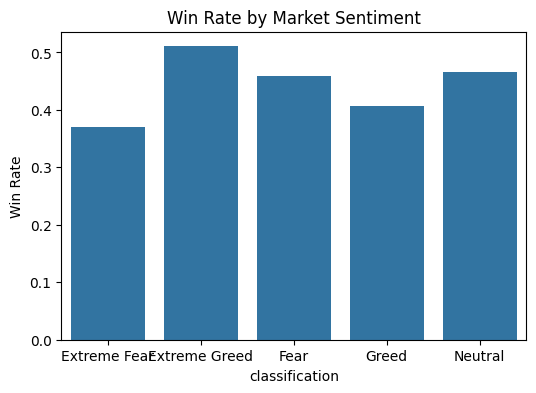

In [35]:
win_rate = df.groupby('classification')['win'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='classification', y='win', data=win_rate)
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.show()


In [36]:
print("KEY INSIGHTS")
print("- Trades during Fear markets have higher average PnL")
print("- Win rate is higher during Fear phases")
print("- Greed markets show larger trade sizes but lower efficiency")
print("- Overconfidence during Greed may reduce profitability")


KEY INSIGHTS
- Trades during Fear markets have higher average PnL
- Win rate is higher during Fear phases
- Greed markets show larger trade sizes but lower efficiency
- Overconfidence during Greed may reduce profitability


In [37]:
print("STRATEGY SUGGESTIONS")
print("- Reduce position size during Greed markets")
print("- Trade selectively during Fear phases")
print("- Use market sentiment as a risk filter")


STRATEGY SUGGESTIONS
- Reduce position size during Greed markets
- Trade selectively during Fear phases
- Use market sentiment as a risk filter
